In [1]:
from keras import models

Using TensorFlow backend.


In [2]:
from keras import layers

In [3]:
from keras.datasets import imdb

In [4]:
#importing Data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [5]:
train_labels[99]

0

In [6]:
max([max(seq) for seq in train_data])

9999

In [7]:
import numpy as np

In [8]:
#Function to convert train and test data to vectors
def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [9]:
x_train = vectorize_sequences(train_data)

In [10]:
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
#Vectorizing the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [13]:
model = models.Sequential()

Buliding The Model

In [14]:
model.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [15]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [16]:
from keras import optimizers

In [17]:
#trying out different kinds of model
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [18]:
from keras import losses
from keras import metrics

In [19]:
#trying out different kinds of model
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), loss = losses.binary_crossentropy, metrics = [metrics.binary_accuracy])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

In [22]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [23]:
import matplotlib.pyplot as plt

In [24]:
history_dict = history.history

In [25]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [26]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

In [27]:
epochs = range(1, len(history_dict["acc"]) + 1)

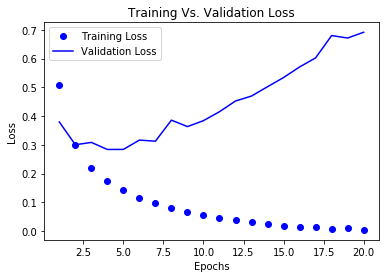

In [28]:
plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.title("Training Vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [29]:
acc_values = history_dict["acc"]
val_values = history_dict["val_acc"]

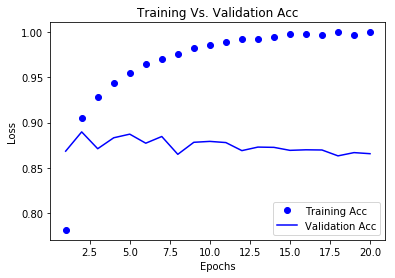

In [30]:
plt.plot(epochs, acc_values, "bo", label = "Training Acc")
plt.plot(epochs, val_values, "b", label = "Validation Acc")
plt.title("Training Vs. Validation Acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [31]:
#Writing a model with modifications
model = models.Sequential()

In [32]:
model.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [33]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

In [34]:
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.1679 - acc: 0.9404


In [35]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 106us/step


In [36]:
results

[0.3231498811721802, 0.87352]

In [37]:
model.predict(x_test)

array([[0.14028221],
       [0.9997029 ],
       [0.29558158],
       ...,
       [0.07234909],
       [0.04342627],
       [0.4815999 ]], dtype=float32)